# Libraries required

In [1]:
import pandas as pd
import os
from plotnine import *
from ds_functions import *
from pandas.api.types import is_numeric_dtype
from pdpbox import pdp
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

/Users/tanmay/.virtualenvs/fun/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.


# Reading the data and preprocessing

In [2]:
df = pd.read_csv('Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [4]:
display_all(df.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [6]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaT,NaT,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaT,NaT,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaT,NaT,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaT,NaT,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaT,NaT,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaT,NaT,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaT,NaT,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaT,NaT,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17,2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.SalePrice = np.log(df.SalePrice)

In [8]:
add_datepart(df, 'saledate')
df.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [9]:
train_cats(df)

In [10]:
df.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [11]:
df.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [12]:
df.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

In [13]:
df.UsageBand =  df.UsageBand.cat.codes

In [16]:
display_all(df.isnull().sum().sort_index()/len(df))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [17]:
os.makedirs('tmp', exist_ok=True)
df.to_feather('tmp/bulldozers-raw')

# Reading Processed File

In [18]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [20]:
display_all(df_raw.describe().T)

,count,mean,std,min,25%,50%,75%,max
SalesID,401125.0,1.919713e+06,9.090215e+05,1.139246e+06,1.418371e+06,1.639422e+06,2.242707e+06,6.333342e+06
SalePrice,401125.0,1.010310e+01,6.936209e-01,8.465900e+00,9.581904e+00,1.008581e+01,1.059663e+01,1.186358e+01
MachineID,401125.0,1.217903e+06,4.409920e+05,0.000000e+00,1.088697e+06,1.279490e+06,1.468067e+06,2.486330e+06
ModelID,401125.0,6.889703e+03,6.221778e+03,2.800000e+01,3.259000e+03,4.604000e+03,8.724000e+03,3.719800e+04
datasource,401125.0,1.346658e+02,8.962237e+00,1.210000e+02,1.320000e+02,1.320000e+02,1.360000e+02,1.720000e+02
auctioneerID,380989.0,6.556040e+00,1.697678e+01,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,9.900000e+01
YearMade,401125.0,1.899157e+03,2.917975e+02,1.000000e+03,1.985000e+03,1.995000e+03,2.000000e+03,2.013000e+03
MachineHoursCurrentMeter,142765.0,3.457955e+03,2.759026e+04,0.000000e+00,0.000000e+00,0.000000e+00,3.025000e+03,2.483300e+06
UsageBand,401125.0,-6.238978e-01,8.702907e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00
saleYear,401125.0,2.004096e+03,5.754190e+00,1.989000e+03,2.000000e+03,2.006000e+03,2.009000e+03,2.011000e+03


In [23]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [24]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.98812981689479

In [21]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

In [8]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [9]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [10]:
set_rf_samples(50000)

In [11]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

In [12]:
x_all = get_sample(df_raw[df_raw.YearMade >1930], 500)

In [13]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,9.259131,1840702,21439,149,1.0,2005,NaN,-1,35NX2,...,2,2,306,False,False,False,False,False,False,1320192000
401121,6333337,9.305651,1830472,21439,149,1.0,2005,NaN,-1,35NX2,...,2,2,306,False,False,False,False,False,False,1320192000
401122,6333338,9.350102,1887659,21439,149,1.0,2005,NaN,-1,35NX2,...,2,2,306,False,False,False,False,False,False,1320192000
401123,6333341,9.104980,1903570,21435,149,2.0,2005,NaN,-1,30NX,...,25,1,298,False,False,False,False,False,False,1319500800


<AxesSubplot:xlabel='YearMade', ylabel='saleElapsed'>

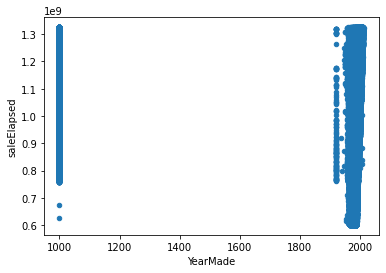

In [46]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter')

# Plotting ggplots

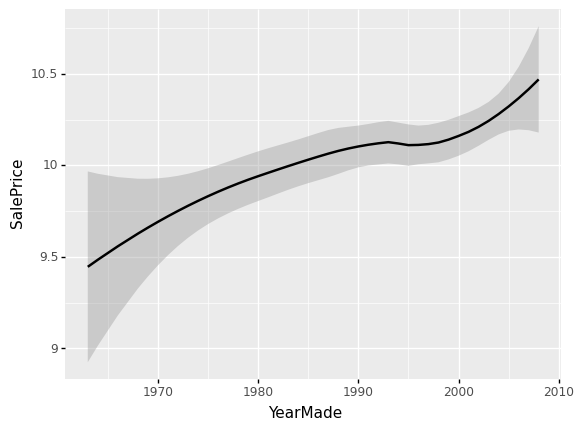

<ggplot: (-9223363271793058279)>

In [21]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

In [24]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [25]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat
    p = pdp.pdp_isolate(m, x, model_features=x.columns, feature=feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, n_cluster_centers=clusters)

# PDP plots

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='YearMade'>})

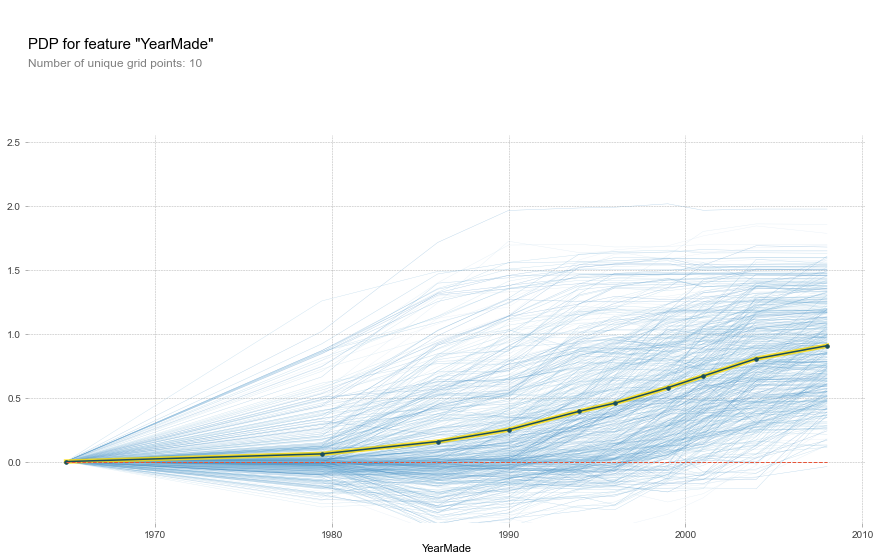

In [13]:
plot_pdp('YearMade')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>, 'pdp_ax': <AxesSubplot:xlabel='YearMade'>})

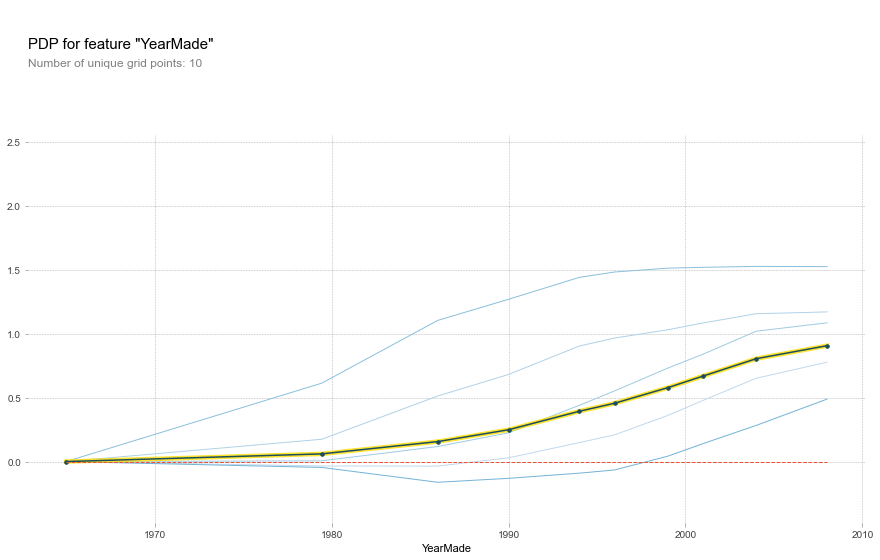

In [14]:
plot_pdp('YearMade', clusters=5)

In [26]:
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x, model_features=x.columns,features=feats)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_inter_ax': <AxesSubplot:xlabel='saleElapsed', ylabel='YearMade'>})

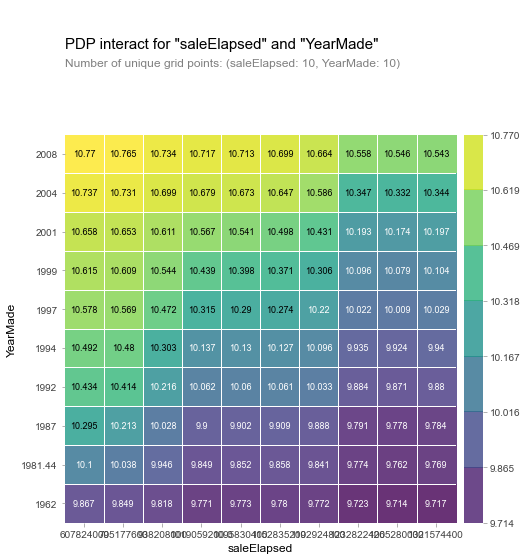

In [27]:
pdp.pdp_interact_plot(p, feats, plot_type='grid')

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_inter_ax': <AxesSubplot:xlabel='saleElapsed', ylabel='YearMade'>})

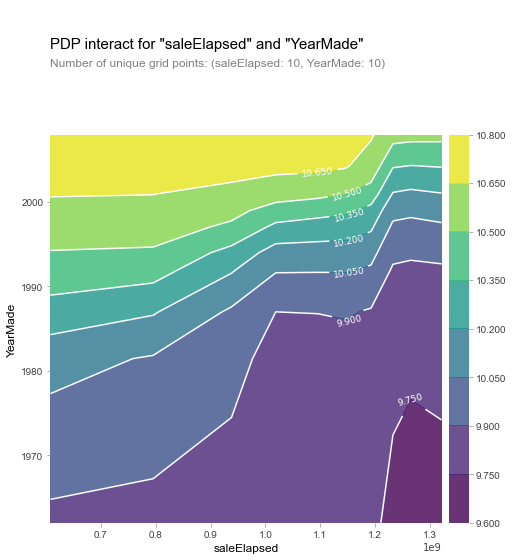

In [32]:
pdp.pdp_interact_plot(p, feats, plot_type='contour')

In [44]:
a = df_raw.saleElapsed.unique()

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_ax': <AxesSubplot:xlabel="['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS']">})

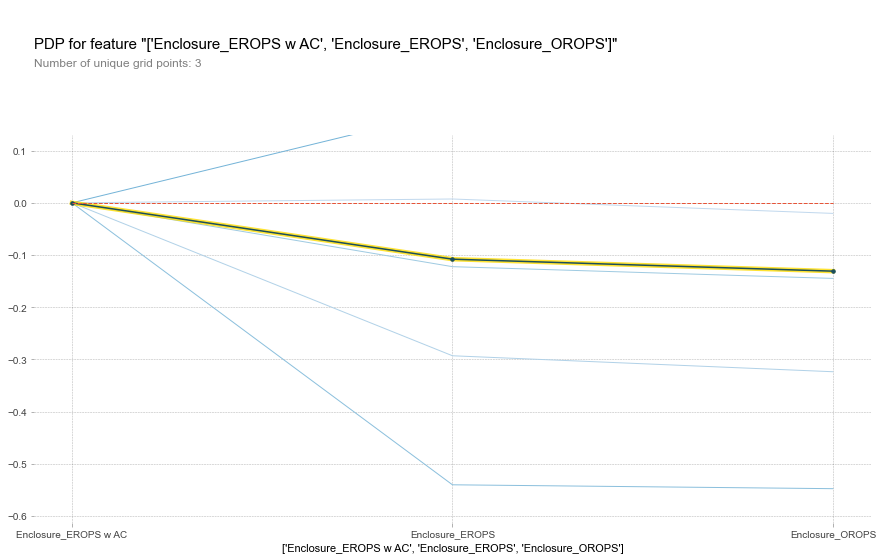

In [18]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In [31]:
df_raw.columns.tolist().sort()